# Задание лабораторной работы

- Выбрать набор данных (датасет).
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

# Выполнение работы

## Текстовое описание датасета

Данный набор доступен по адресу: https://www.kaggle.com/datasets/saurabhbadole/life-expectancy-based-on-geographic-locations

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Чтение данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LifeExpectancy.csv', encoding='unicode_escape')

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.shape

(2928, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [ ]:
data = data.dropna()

Набор содержит как категориальные признаки, так и числовые.

## История о данных

Возьмем признаки: `Status` (категориальный), `Life expectancy` (числовой) и `Population` (числовой). По методологии `data_to_viz` построим `Scatter Plot` (Точечный график), `2D Density` (Двумерное распределение), `Box Plot` (Ящик с усами), `Violin Plot` и `Correlogram`.

In [ ]:
x = data["Life expectancy"]
y = data["Population"]
z = data["Status"]
d = data[["Life expectancy", "Population", "Status"]]

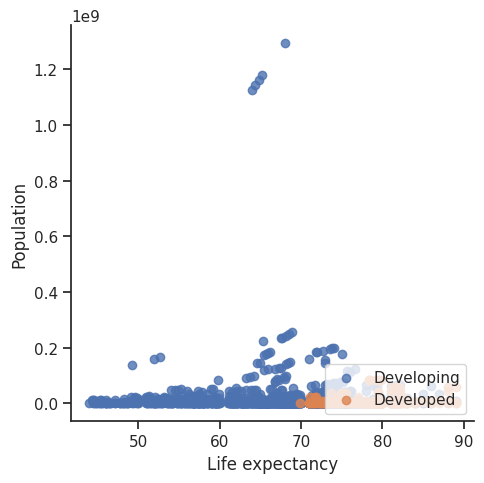

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Life expectancy", y="Population", data=d, fit_reg=False, hue="Status", legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

Точечный график (`Scatter Plot`) показывает зависимость между двумя числовыми признаками - `Life expectancy` и `Population`. Цветными метками отображены распределение по `Status`.

<ipython-input-13-f8eb10e25fc7>:18: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde(a)


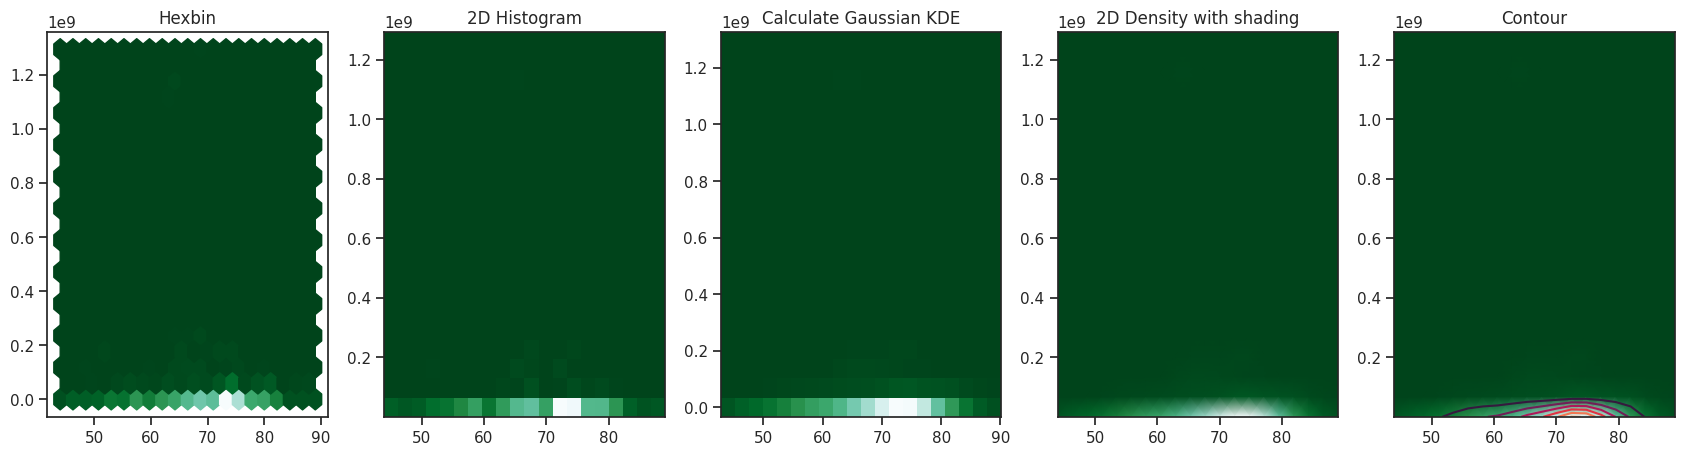

In [ ]:
from scipy.stats import kde

a = x, y

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(21, 5))

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[0].set_title('Hexbin')
axes[0].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

# 2D Histogram
axes[1].set_title('2D Histogram')
axes[1].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(a)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# plot a density
axes[2].set_title('Calculate Gaussian KDE')
axes[2].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)

# add shading
axes[3].set_title('2D Density with shading')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

# contour
axes[4].set_title('Contour')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[4].contour(xi, yi, zi.reshape(xi.shape) )

Двумерное распределение по признакам `Life expectancy` и `Population` показывает в цветном эквиваленте где больше всего есть значений данных. Чем ярче область, тем больше значений.

<Axes: xlabel='Status', ylabel='Life expectancy'>

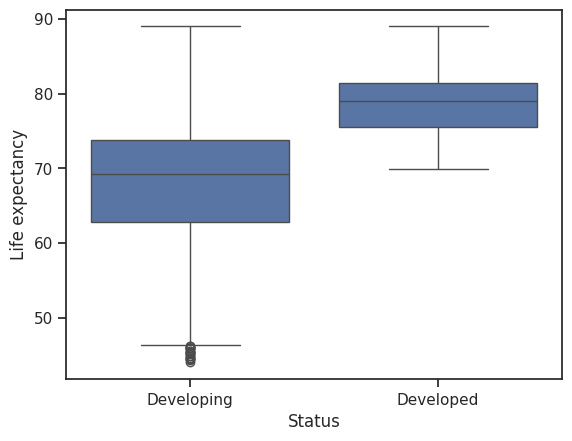

In [ ]:
sns.boxplot( x=z, y=x )

<Axes: xlabel='Status', ylabel='Population'>

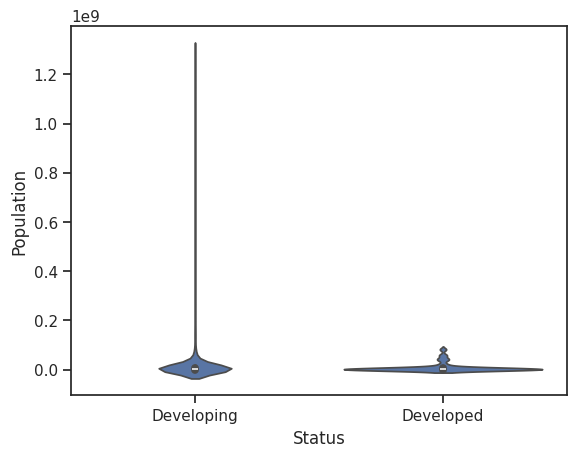

In [ ]:
sns.violinplot(x=z, y=y)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)


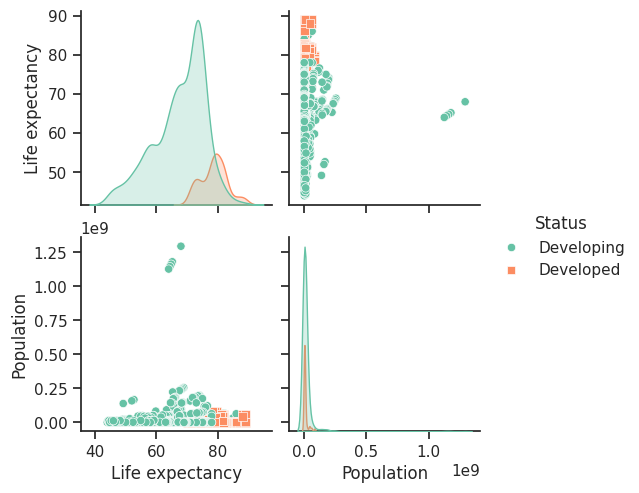

In [ ]:
sns.pairplot(d, kind="scatter", hue="Status", markers=["o", "s", "D"], palette="Set2")
plt.show()

Парные диаграммы (`Correlogram`) показывают зависимости между двумя признаками на совокупности различных диаграмм.